In [1]:
# from maze_env import Maze
from stock_env import stock
from RL_brain import DeepQNetwork
import pandas as pd

In [2]:
def game_step(observation, step=None, train=True, show_log=False, my_trick=False):
    
    # RL choose action based on observation
    action = RL.choose_action(observation)
    #action = RL.choose_action(observation, train)

    # RL take action and get next observation and reward
    observation_, reward, done = env.step(action, show_log=show_log, my_trick=my_trick)

    RL.store_transition(observation, action, reward, observation_)
    # print("total profit:%.3f" % env.total_profit, end='\r')
    if step and (step > 200) and (step % 5 == 0):
        RL.learn()

    # swap observation
    observation = observation_
    
    return observation, done
    

In [3]:
def run(max_round):
    step = 0
    for episode in range(max_round):
        # initial observation
        observation = env.reset()

        while True:
            
            observation, done = game_step(observation, step=step)
            # print(observation)
            # break while loop when end of this episode
            if done:
                break
            step += 1
        
        print('epoch:%d, total_profit:%.3f' % (episode, env.total_profit))
        # BackTest(False)

In [4]:
def BackTest(env, show_log=True, my_trick=False):
    observation = env.reset()
    # step=0
    while True:
        observation, done = game_step(observation, train=False, 
                                      show_log=show_log, my_trick=my_trick)
        # break while loop when end of this episode
        if done:
            break
    print('total_profit:%.3f' % (env.total_profit))
    return env

# 新

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
epoch:0, total_profit:-27107.798
epoch:1, total_profit:-1085.927
epoch:2, total_profit:-5704.014
epoch:3, total_profit:-40805.879
epoch:4, total_profit:48391.560
epoch:5, total_profit:-26574.295
epoch:6, total_profit:26937.876
epoch:7, total_profit:-20537.411
epoch:8, total_profit:-36698.739
epoch:9, total_profit:-13719.649
epoch:10, total_profit:-17590.579
epoch:11, total_profit:-11093.624
epoch:12, total_profit:-32299.793
epoch:13, total_profit:-9920.098
epoch:14, total_profit:-34461.206
epoch:15, total_profit:-27353.659
epoch:16, total_profit:-8995.497
epoch:17, total_profit:644.493
epoch:18, total_profit:-38039.452
epoch:19, total_profit:-34267.502
epoch:20, 

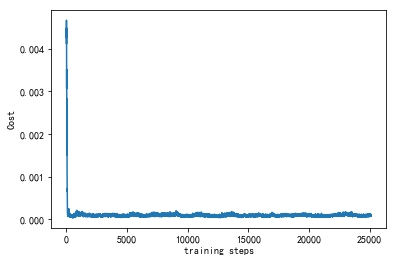

In [5]:
#reward=资产变幅
if __name__ == "__main__":
    max_round = 60
    file_path = '601398.SH_NormalData.csv' #工商银行
    df = pd.read_csv(file_path)
    df = df.sort_values('trade_date', ascending=True)
    df = df.iloc[22:].reset_index(drop=True) # 去除前几天没有均线信息
    
    env = stock(df.iloc[0:2100]) #2011.1.4-2020.11.30，前2100条数据为训练数据，后268条数据为预测数据
    RL = DeepQNetwork(env.n_actions, env.n_features,
                      learning_rate=0.001,
                      reward_decay=0.99,
                      e_greedy=0.9,
                      replace_target_iter=200,
                      memory_size=4000,
                      batch_size=512,
                      e_greedy_increment=0.05,
                      output_graph=True
                      )
    
    run(max_round)
    # env = stock(df)
    # env = BackTest(env, show_log=True)
    # env.draw('trade.png', 'profit.png')
    
    env = stock(df.iloc[2100:].reset_index(drop=True))
    env1 = BackTest(env, show_log=True)
    env1.draw('trade1.png', 'profit1.png')
    
    env2 = BackTest(env, show_log=True, my_trick=True)
    env2.draw('trade2.png', 'profit2.png')
    RL.plot_cost()